In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from datetime import datetime
import seaborn as sb

In [2]:
df=pd.read_csv("irradiation_dataset.csv")

In [3]:
df.head()

,air_temp,albedo,clearsky_dhi,clearsky_dni,clearsky_ghi,clearsky_gti,cloud_opacity,dewpoint_temp,dhi,dni,...,precipitation_rate,relative_humidity,surface_pressure,snow_depth,wind_direction_100m,wind_direction_10m,wind_speed_100m,wind_speed_10m,period_end,period
0,16,0.17,0,0,0,0,2.0,14.2,0,0,...,0.0,86.8,988.9,0,344,346,3.4,1.9,2007-01-01T01:00:00Z,PT60M
1,18,0.17,13,5,14,15,5.4,14.4,13,0,...,0.0,82.1,989.9,0,354,353,3.2,1.6,2007-01-01T02:00:00Z,PT60M
2,18,0.17,93,79,113,129,0.4,14.2,93,77,...,0.0,77.0,991.0,0,0,352,2.7,1.1,2007-01-01T03:00:00Z,PT60M
3,19,0.17,182,183,261,303,0.0,13.4,182,183,...,0.0,70.9,991.9,0,3,354,1.8,1.0,2007-01-01T04:00:00Z,PT60M
4,23,0.17,255,268,409,476,0.0,13.4,255,268,...,0.0,55.5,992.2,0,9,6,1.2,1.0,2007-01-01T05:00:00Z,PT60M


# CORRELATION MATRIX

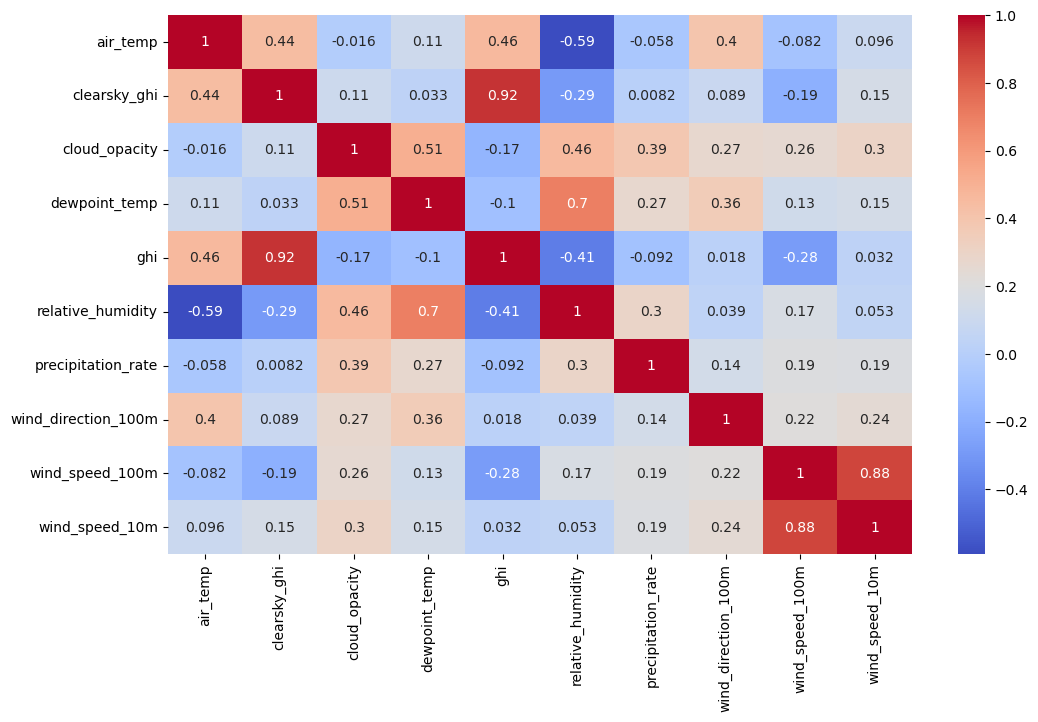

In [4]:
import matplotlib.pyplot as plt
import seaborn as sb

plt.figure(figsize=(12, 7))
subset_df = df[['air_temp','clearsky_ghi','cloud_opacity','dewpoint_temp', 'ghi','relative_humidity','precipitation_rate','wind_direction_100m','wind_speed_100m','wind_speed_10m']]
dataplot = sb.heatmap(subset_df.corr(), cmap="coolwarm", annot=True)  
plt.show()


# Dropping colomns

In [5]:
df.drop(['albedo'],axis=1,inplace=True)
df.drop(['clearsky_dhi'],axis=1,inplace=True)
df.drop(['clearsky_dni'],axis=1,inplace=True)
df.drop(['clearsky_gti'],axis=1,inplace=True)
df.drop(['dhi'],axis=1,inplace=True)
df.drop(['dni'],axis=1,inplace=True)
df.drop(['surface_pressure'],axis=1,inplace=True)
df.drop(['snow_depth'],axis=1,inplace=True)
df.drop(['period'],axis=1,inplace=True)
df.drop(['gti'],axis=1,inplace=True)
df.drop(['wind_direction_100m'],axis=1,inplace=True)
df.drop(['wind_direction_10m'],axis=1,inplace=True)
df.drop(['wind_speed_10m'],axis=1,inplace=True)

In [6]:
df.isnull().sum()

air_temp              0
clearsky_ghi          0
cloud_opacity         0
dewpoint_temp         0
ghi                   0
precipitation_rate    0
relative_humidity     0
wind_speed_100m       0
period_end            0
dtype: int64

In [7]:
df.rename(columns={'wind_speed_100m': 'wind_speed'}, inplace=True)
df.rename(columns={'period_end': 'DateTime'}, inplace=True)
df.rename(columns={'ghi': 'GHI'}, inplace=True)

In [8]:
df.head()

,air_temp,clearsky_ghi,cloud_opacity,dewpoint_temp,GHI,precipitation_rate,relative_humidity,wind_speed,DateTime
0,16,0,2.0,14.2,0,0.0,86.8,3.4,2007-01-01T01:00:00Z
1,18,14,5.4,14.4,13,0.0,82.1,3.2,2007-01-01T02:00:00Z
2,18,113,0.4,14.2,113,0.0,77.0,2.7,2007-01-01T03:00:00Z
3,19,261,0.0,13.4,261,0.0,70.9,1.8,2007-01-01T04:00:00Z
4,23,409,0.0,13.4,409,0.0,55.5,1.2,2007-01-01T05:00:00Z


# FEATURE EXTRACTION

In [9]:
df['timestamp']=pd.to_datetime(df.DateTime)
df['year']=df.timestamp.dt.year
df['month']=df.timestamp.dt.month
df['day']=df.timestamp.dt.day
df['hour']=df.timestamp.dt.hour

In [10]:
df.drop(['DateTime'],axis=1,inplace=True)

In [11]:
df.drop(['timestamp'],axis=1,inplace=True)

In [12]:
df.head()

,air_temp,clearsky_ghi,cloud_opacity,dewpoint_temp,GHI,precipitation_rate,relative_humidity,wind_speed,year,month,day,hour
0,16,0,2.0,14.2,0,0.0,86.8,3.4,2007,1,1,1
1,18,14,5.4,14.4,13,0.0,82.1,3.2,2007,1,1,2
2,18,113,0.4,14.2,113,0.0,77.0,2.7,2007,1,1,3
3,19,261,0.0,13.4,261,0.0,70.9,1.8,2007,1,1,4
4,23,409,0.0,13.4,409,0.0,55.5,1.2,2007,1,1,5


## Identifying outliers through IQR and replacing them with the mean of their neighbours

In [13]:
h=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]

outliers = [1] 

while len(outliers) != 0:
    outliers = []
    for i in h:
      y = df[df['hour'] == i]['GHI']
      q1 = y.quantile(0.25)
      q3 = y.quantile(0.75)
      iqr = q3 - q1
      max_ = q3 + 1.5 * iqr
      min_ = q1 - 1.5 * iqr
      mean_value = y.mean()


      for index, value in y.items():
        if (value < min_) or (value > max_):
          df.at[index, 'GHI'] = mean_value

    h=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]

    for i in h:
       y = df[df['hour'] == i]['GHI']
       q1 = y.quantile(0.25)
       q3 = y.quantile(0.75)
       iqr = q3 - q1
       max_ = q3 + 1.5 * iqr
       min_ = q1 - 1.5 * iqr
       mean_value = y.mean()

       for index, value in y.items():
        if (value < min_) or (value > max_):
          outliers.append(value)


print(f"Length of Outliers: {len(outliers)}")

Length of Outliers: 0


# Mean GHI  of the whole dataset


In [14]:
df['GHI'].mean()

219.4747909076727

# Finding monthly  GHI average

In [15]:
import pandas as pd
filtered_df = df[(df['year'] >= 2007) & (df['year'] <= 2015)]
monthly_average_ghi = filtered_df.groupby(['year', 'month'])['GHI'].mean().reset_index()

In [16]:
monthly_average_ghi.head()

,year,month,GHI
0,2007,1,199.347491
1,2007,2,229.126488
2,2007,3,257.470150
3,2007,4,268.021459
4,2007,5,267.037743


# Classifying each month as Summer,Winter or Monsson on the basis of threshold value

In [17]:
import pandas as pd

monthly_mean_ghi = df.groupby(['year', 'month'])['GHI'].mean().reset_index()

monthly_mean_ghi['Season'] = pd.cut(
    monthly_mean_ghi['GHI'],
    bins=[-float('inf'), 215, 245, float('inf')],
    labels=['Winter', 'Monsoon', 'Summer']
)
monthly_mean_ghi.head(10)


,year,month,GHI,Season
0,2007,1,199.347491,Winter
1,2007,2,229.126488,Monsoon
2,2007,3,257.470150,Summer
3,2007,4,268.021459,Summer
4,2007,5,267.037743,Summer
5,2007,6,216.227974,Monsoon
6,2007,7,203.934325,Winter
7,2007,8,203.560956,Winter
8,2007,9,206.954785,Winter
9,2007,10,228.006044,Monsoon


In [18]:
df_merged = pd.merge(df, monthly_mean_ghi[['year', 'month', 'Season']], on=['year', 'month'], how='left')

In [19]:
df1=df_merged.copy()

In [20]:
season_counts = monthly_mean_ghi['Season'].value_counts()
print(season_counts)

Winter     59
Summer     25
Monsoon    23
Name: Season, dtype: int64


In [21]:
season_counts = df1['Season'].value_counts()
print(season_counts)

Winter     43248
Summer     18384
Monsoon    16440
Name: Season, dtype: int64


# Visualizing the spread of GHI in the dataset

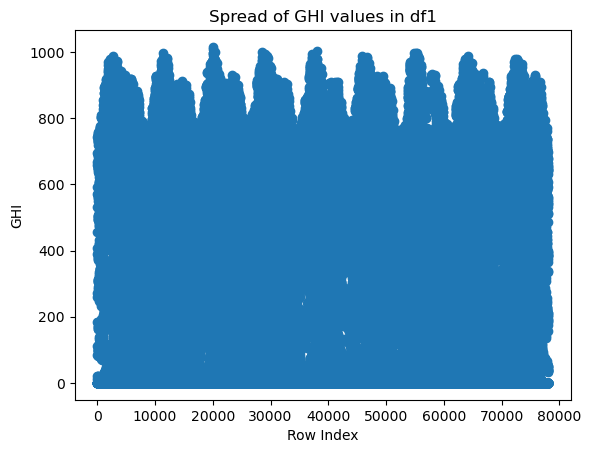

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

x_axis = df1.index

# Plot scatter plot
plt.scatter(x_axis, df1['GHI'])
plt.xlabel('Row Index')
plt.ylabel('GHI')
plt.title('Spread of GHI values in df1')
plt.show()


# Visualizing the classification of GHI on the basis of Seasons

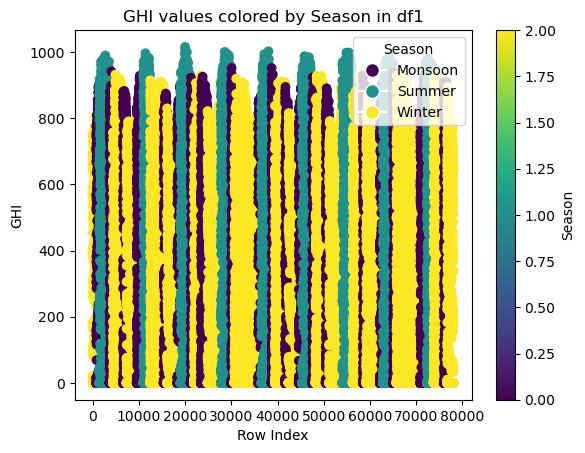

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df1['Season_Label'] = label_encoder.fit_transform(df1['Season'])


scatter = plt.scatter(df1.index, df1['GHI'], c=df1['Season_Label'], cmap='viridis')

plt.xlabel('Row Index')
plt.ylabel('GHI')
plt.title('GHI values colored by Season in df1')
plt.colorbar(label='Season')


legend_labels = {idx: label for idx, label in enumerate(label_encoder.classes_)}
handles = [plt.Line2D([0], [0], marker='o', color='w', label=legend_labels[idx], markerfacecolor=scatter.cmap(scatter.norm(idx)), markersize=10) for idx in range(len(legend_labels))]
plt.legend(handles=handles, title='Season', loc='upper right')

plt.show()


# Visualizing calssification of GHI for the year 2009

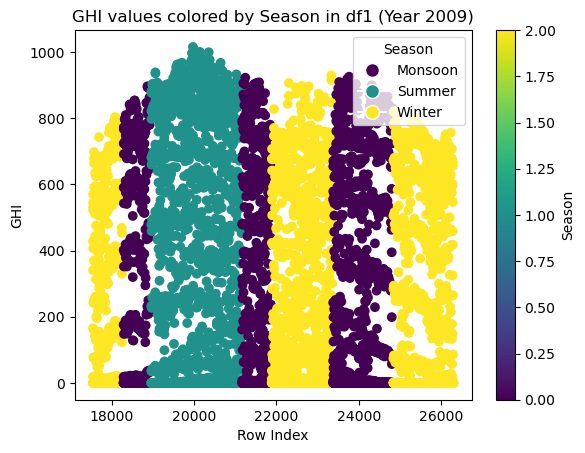

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder


df_2009 = df1[df1['year'] == 2009].copy() 

# Convert 'Season' column to numerical values
label_encoder = LabelEncoder()
df_2009['Season_Label'] = label_encoder.fit_transform(df_2009['Season'])

scatter = plt.scatter(df_2009.index, df_2009['GHI'], c=df_2009['Season_Label'], cmap='viridis')

plt.xlabel('Row Index')
plt.ylabel('GHI')
plt.title('GHI values colored by Season in df1 (Year 2009)')
plt.colorbar(label='Season')

legend_labels = {idx: label for idx, label in enumerate(label_encoder.classes_)}
handles = [plt.Line2D([0], [0], marker='o', color='w', label=legend_labels[idx], markerfacecolor=scatter.cmap(scatter.norm(idx)), markersize=10) for idx in range(len(legend_labels))]
plt.legend(handles=handles, title='Season', loc='upper right')

plt.show()


In [25]:
df1.head()

,air_temp,clearsky_ghi,cloud_opacity,dewpoint_temp,GHI,precipitation_rate,relative_humidity,wind_speed,year,month,day,hour,Season,Season_Label
0,16,0,2.0,14.2,0.0,0.0,86.8,3.4,2007,1,1,1,Winter,2
1,18,14,5.4,14.4,13.0,0.0,82.1,3.2,2007,1,1,2,Winter,2
2,18,113,0.4,14.2,113.0,0.0,77.0,2.7,2007,1,1,3,Winter,2
3,19,261,0.0,13.4,261.0,0.0,70.9,1.8,2007,1,1,4,Winter,2
4,23,409,0.0,13.4,409.0,0.0,55.5,1.2,2007,1,1,5,Winter,2


#  CLUSTERING THROUGH KMEANS++
## Subdividing each season into 2 classes :-
### 1) Summer - clear & non-clear based on ['air_temp', 'clearsky_ghi']
### 2) Winter - dry & moist based on ['dewpoint_temp', 'relative_humidity']
### 3) Monsoon - cloudy & partly cloudy based on ['cloud_opacity', 'wind_speed']

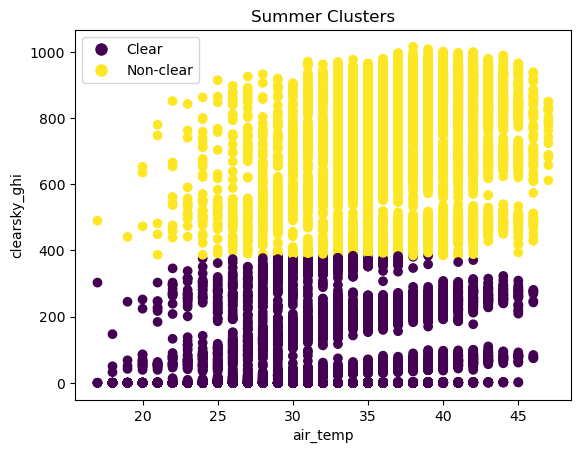

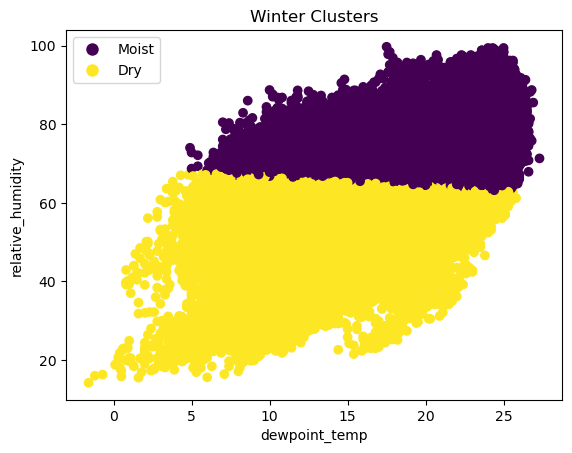

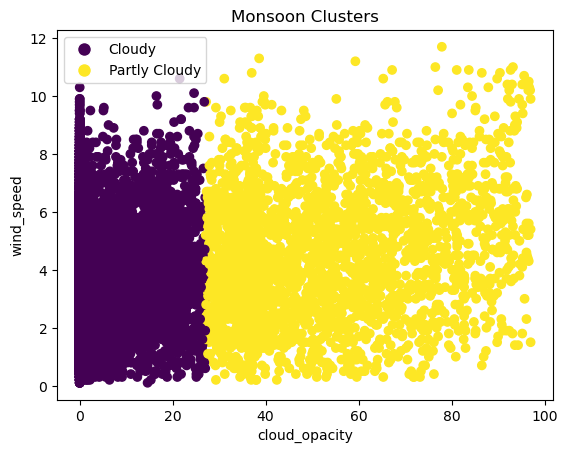

       air_temp  clearsky_ghi  cloud_opacity  dewpoint_temp    GHI  \
0            16             0            2.0           14.2    0.0   
1            18            14            5.4           14.4   13.0   
2            18           113            0.4           14.2  113.0   
3            19           261            0.0           13.4  261.0   
4            23           409            0.0           13.4  409.0   
...         ...           ...            ...            ...    ...   
78067        22             0            0.0           16.0    0.0   
78068        21             0            0.0           15.8    0.0   
78069        21             0            0.0           15.9    0.0   
78070        21             0            0.0           16.3    0.0   
78071        22             0            0.0           16.7    0.0   

       precipitation_rate  relative_humidity  wind_speed  year  month  day  \
0                     0.0               86.8         3.4  2007      1    1   
1  

In [26]:
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np

features_summer = ['air_temp', 'clearsky_ghi']
features_winter = ['dewpoint_temp', 'relative_humidity']
features_monsoon = ['cloud_opacity', 'wind_speed']


season_cluster_mapping = {'Summer': 2, 'Monsoon': 2, 'Winter': 2}


season_label_mapping = {'Summer': 1, 'Winter': 2, 'Monsoon': 3}
df1['Season_Label'] = df1['Season'].map(season_label_mapping)


for season, cluster_count in season_cluster_mapping.items():
    season_indices = df1['Season_Label'] == season_label_mapping[season]

    if np.sum(season_indices) > 0:
        X_season = df1.loc[season_indices, features_summer] if season == 'Summer' else (df1.loc[season_indices, features_winter] if season == 'Winter' else df1.loc[season_indices, features_monsoon])
        kmeans = KMeans(n_clusters=cluster_count, init='k-means++', random_state=42, n_init=10)
        df1.loc[season_indices, f'{season}_Cluster'] = kmeans.fit_predict(X_season)

        if season == 'Summer':
            df1.loc[season_indices, f'{season}_Type'] = np.where(df1.loc[season_indices, f'{season}_Cluster'] == 0, 'Clear', 'Non-clear')
            df1.loc[season_indices, 'Winter_Type'] = np.nan
            df1.loc[season_indices, 'Monsoon_Type'] = np.nan
        elif season == 'Winter':
            df1.loc[season_indices, f'{season}_Type'] = np.where(df1.loc[season_indices, f'{season}_Cluster'] == 0, 'Moist', 'Dry')
            df1.loc[season_indices, 'Summer_Type'] = np.nan
            df1.loc[season_indices, 'Monsoon_Type'] = np.nan
        elif season == 'Monsoon':
            df1.loc[season_indices, f'{season}_Type'] = np.where(df1.loc[season_indices, f'{season}_Cluster'] == 0, 'Cloudy', 'Partly Cloudy')
            df1.loc[season_indices, 'Summer_Type'] = np.nan
            df1.loc[season_indices, 'Winter_Type'] = np.nan
    else:

        df1[f'{season}_Cluster'] = np.nan
        df1[f'{season}_Type'] = np.nan
        


# Plotting Summer Clusters
summer_clusters = df1[df1['Season'] == 'Summer']
scatter = plt.scatter(summer_clusters[features_summer[0]], summer_clusters[features_summer[1]], c=summer_clusters['Summer_Cluster'], cmap='viridis', label='Summer Clusters')
plt.xlabel(features_summer[0])
plt.ylabel(features_summer[1])
plt.title('Summer Clusters')

legend_labels = {0: 'Clear', 1: 'Non-clear'}  
handles = [plt.Line2D([0], [0], marker='o', color='w', label=legend_labels[idx], markerfacecolor=scatter.cmap(scatter.norm(idx)), markersize=10) for idx in range(len(legend_labels))]
plt.legend(handles=handles)


plt.show()

# Plotting Winter Clusters
winter_clusters = df1[df1['Season'] == 'Winter']
scatter = plt.scatter(winter_clusters[features_winter[0]], winter_clusters[features_winter[1]], c=winter_clusters['Winter_Cluster'], cmap='viridis', label='Winter Clusters')
plt.xlabel(features_winter[0])
plt.ylabel(features_winter[1])
plt.title('Winter Clusters')

legend_labels = {0: 'Moist', 1: 'Dry'}  
handles = [plt.Line2D([0], [0], marker='o', color='w', label=legend_labels[idx], markerfacecolor=scatter.cmap(scatter.norm(idx)), markersize=10) for idx in range(len(legend_labels))]
plt.legend(handles=handles)


plt.show()

# Plotting Monsoon Clusters
monsoon_clusters = df1[df1['Season'] == 'Monsoon']
scatter = plt.scatter(monsoon_clusters[features_monsoon[0]], monsoon_clusters[features_monsoon[1]], c=monsoon_clusters['Monsoon_Cluster'], cmap='viridis', label='Monsoon Clusters')
plt.xlabel(features_monsoon[0])
plt.ylabel(features_monsoon[1])
plt.title('Monsoon Clusters')

# Custom Legend for Monsoon Clusters
legend_labels = {0: 'Cloudy', 1: 'Partly Cloudy'}  
handles = [plt.Line2D([0], [0], marker='o', color='w', label=legend_labels[idx], markerfacecolor=scatter.cmap(scatter.norm(idx)), markersize=10) for idx in range(len(legend_labels))]
plt.legend(handles=handles)

plt.show()

df1.drop([f'{season}_Cluster' for season in season_cluster_mapping.keys()], axis=1, inplace=True)

df1['Combined_Type'] = df1[['Summer_Type', 'Monsoon_Type', 'Winter_Type']].apply(lambda x: ''.join(x.dropna()), axis=1)



df1.drop('Season_Label', axis=1, inplace=True)


print(df1)


In [27]:
df1.head()

,air_temp,clearsky_ghi,cloud_opacity,dewpoint_temp,GHI,precipitation_rate,relative_humidity,wind_speed,year,month,day,hour,Season,Summer_Type,Winter_Type,Monsoon_Type,Combined_Type
0,16,0,2.0,14.2,0.0,0.0,86.8,3.4,2007,1,1,1,Winter,NaN,Moist,NaN,Moist
1,18,14,5.4,14.4,13.0,0.0,82.1,3.2,2007,1,1,2,Winter,NaN,Moist,NaN,Moist
2,18,113,0.4,14.2,113.0,0.0,77.0,2.7,2007,1,1,3,Winter,NaN,Moist,NaN,Moist
3,19,261,0.0,13.4,261.0,0.0,70.9,1.8,2007,1,1,4,Winter,NaN,Moist,NaN,Moist
4,23,409,0.0,13.4,409.0,0.0,55.5,1.2,2007,1,1,5,Winter,NaN,Dry,NaN,Dry


In [28]:
season_counts = df1['Combined_Type'].value_counts()
print(season_counts)

Moist            27141
Dry              16107
Cloudy           13523
Clear            12039
Non-clear         6345
Partly Cloudy     2917
Name: Combined_Type, dtype: int64


# Replacing the categorical values with numerical values

In [29]:

df1['Summer_Type'].replace({'Clear': 1, 'Non-clear': 0}, inplace=True)

df1['Winter_Type'].replace({'Moist': 0, 'Dry': 1}, inplace=True)

df1['Monsoon_Type'].replace({'Cloudy': 0, 'Partly Cloudy': 1}, inplace=True)

df1['Summer_Type'].fillna(-1, inplace=True)
df1['Winter_Type'].fillna(-1, inplace=True)
df1['Monsoon_Type'].fillna(-1, inplace=True)


In [30]:

type_mapping = {'Clear': 0, 'Non-clear': 1, 'Moist': 2, 'Dry': 3, 'Cloudy': 4, 'Partly Cloudy': 5}
df1['Combined_Type'] = df1['Combined_Type'].replace(type_mapping)

# Kmeans ++ with SVR

In [32]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np


cluster_features = ['Summer_Type', 'Monsoon_Type', 'Winter_Type', 'air_temp', 'clearsky_ghi']

target_variable = 'GHI'

X = df1[cluster_features]
y = df1[target_variable]

scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)
y_normalized = scaler.fit_transform(y.values.reshape(-1, 1))

X_train, X_test, y_train, y_test = train_test_split(X_normalized, y_normalized, test_size=0.2, random_state=42)

# Define the parameter grid for GridSearchCV
param_grid = {'C': np.logspace(-1, 1, 10), 'epsilon': np.linspace(0.1, 0.5, 5)}

# Create the SVR model
svr_model = SVR(kernel='rbf')

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(svr_model, param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train.ravel())

# Get the best hyperparameters from the grid search
best_C = grid_search.best_params_['C']
best_epsilon = grid_search.best_params_['epsilon']

# Train the SVR model with the best hyperparameters
best_svr_model = SVR(kernel='rbf', C=best_C, epsilon=best_epsilon)
best_svr_model.fit(X_train, y_train.ravel())

# Make predictions on the test set
svr_predictions_normalized = best_svr_model.predict(X_test)

# Evaluate the model
svr_mse = mean_squared_error(y_test, svr_predictions_normalized)
svr_rmse = np.sqrt(svr_mse)
svr_r_squared = r2_score(y_test, svr_predictions_normalized)

df1['Predicted_GHI_Normalized_SVR'] = best_svr_model.predict(X_normalized)

# INVERSE TRANSFORMATION 
predicted_ghi_inverse_svr = scaler.inverse_transform(best_svr_model.predict(X_normalized).reshape(-1, 1))

df1['Predicted_ghi_SVR'] = predicted_ghi_inverse_svr

print(f"\nBest SVR Hyperparameters: C={best_C}, epsilon={best_epsilon}")
print(f"SVR Mean Squared Error: {svr_mse}")
print(f"SVR Root Mean Squared Error: {svr_rmse}")
print(f"SVR R-squared: {svr_r_squared}")



Best SVR Hyperparameters: C=0.2782559402207124, epsilon=0.1
SVR Mean Squared Error: 0.0050662159842940965
SVR Root Mean Squared Error: 0.07117735583943882
SVR R-squared: 0.9404709739439285


In [33]:
df1.head()

,air_temp,clearsky_ghi,cloud_opacity,dewpoint_temp,GHI,precipitation_rate,relative_humidity,wind_speed,year,month,day,hour,Season,Summer_Type,Winter_Type,Monsoon_Type,Combined_Type,Predicted_GHI_Normalized_SVR,Predicted_ghi_SVR
0,16,0,2.0,14.2,0.0,0.0,86.8,3.4,2007,1,1,1,Winter,-1.0,0.0,-1.0,2,0.055161,56.043581
1,18,14,5.4,14.4,13.0,0.0,82.1,3.2,2007,1,1,2,Winter,-1.0,0.0,-1.0,2,0.051731,52.558704
2,18,113,0.4,14.2,113.0,0.0,77.0,2.7,2007,1,1,3,Winter,-1.0,0.0,-1.0,2,0.106953,108.664251
3,19,261,0.0,13.4,261.0,0.0,70.9,1.8,2007,1,1,4,Winter,-1.0,0.0,-1.0,2,0.204260,207.527785
4,23,409,0.0,13.4,409.0,0.0,55.5,1.2,2007,1,1,5,Winter,-1.0,1.0,-1.0,3,0.372151,378.105331


In [34]:
df1.rename(columns={'Predicted_ghi_SVR': 'Predicted_ghi'}, inplace=True)

# PLOTTING ACTUAL_GHI vs PREDICTED_GHI

# MONSOON

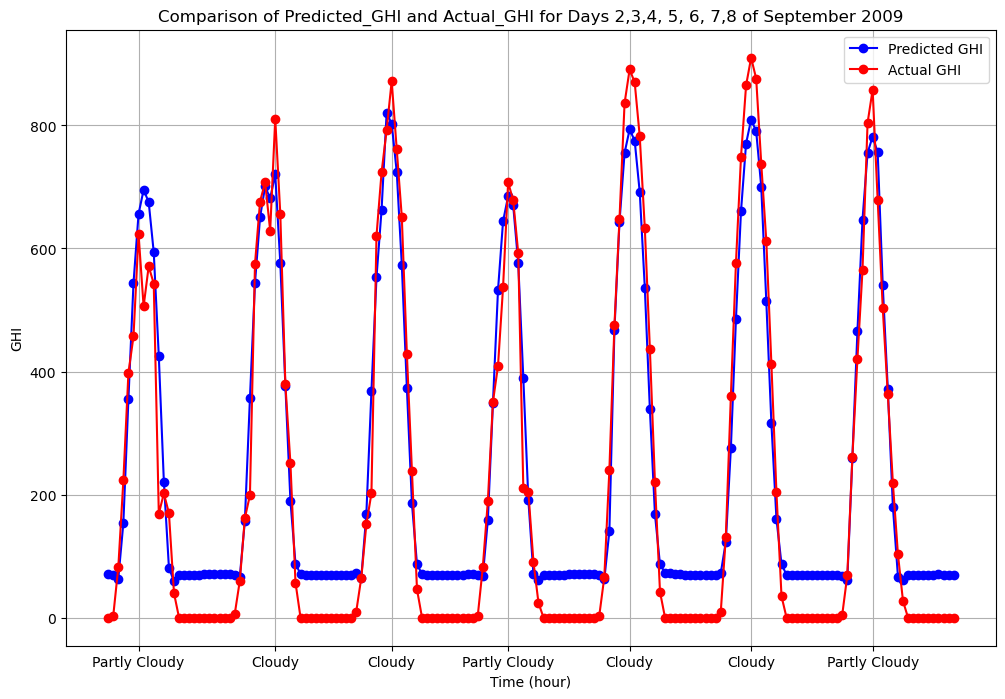

In [35]:
import matplotlib.pyplot as plt

selected_dates_df = df1[(df1['year'] == 2009) & (df1['month'] == 9) & (df1['day'].isin([2,3,4, 5, 6, 7, 8]))]

fig, ax = plt.subplots(figsize=(12, 8))

combined_type_labels = {0: 'Clear', 1: 'Non-clear', 2: 'Moist', 3: 'Dry', 4: 'Cloudy', 5: 'Partly Cloudy'}

day_labels = []
peak_positions = []
season_labels = []

for day in [2,3,4, 5, 6, 7, 8]:
    selected_day_df = selected_dates_df[selected_dates_df['day'] == day]
    mode_combined_type = selected_day_df['Combined_Type'].mode().iloc[0]
    day_labels.append(combined_type_labels[mode_combined_type])

    peak_position = selected_day_df.loc[selected_day_df['GHI'].idxmax(), 'hour'] + (day - 1) * 24
    peak_positions.append(peak_position)

    mode_season = selected_day_df['Season'].mode().iloc[0]
    season_labels.append(mode_season)

# Plotting
for idx, day in enumerate([2,3,4, 5, 6, 7, 8]):
    selected_day_df = selected_dates_df[selected_dates_df['day'] == day]

    position_predicted = selected_day_df['hour'] + (day - 1) * 24
    ax.plot(position_predicted, selected_day_df['Predicted_ghi'], marker='o', color='blue', label='Predicted GHI' if idx == 0 else '')

for idx, day in enumerate([2,3,4, 5, 6, 7, 8]):
    selected_day_df = selected_dates_df[selected_dates_df['day'] == day]
    position_normalized = selected_day_df['hour'] + (day - 1) * 24
    ax.plot(position_normalized, selected_day_df['GHI'], marker='o', color='red', label='Actual GHI' if idx == 0 else '')

ax.set_xticks([pos for pos in peak_positions if pos is not None])
ax.set_xticklabels([label for label, pos in zip(day_labels, peak_positions) if pos is not None])

legend = ax.legend()
legend.get_lines()[0].set_linestyle('-')  
legend.get_lines()[0].set_color('blue')  
legend.get_lines()[1].set_linestyle('-')  
legend.get_lines()[1].set_color('red')

ax.set_title('Comparison of Predicted_GHI and Actual_GHI for Days 2,3,4, 5, 6, 7,8 of September 2009')
ax.set_xlabel('Time (hour)')
ax.set_ylabel('GHI')
ax.grid(True)
plt.show()

# WINTER

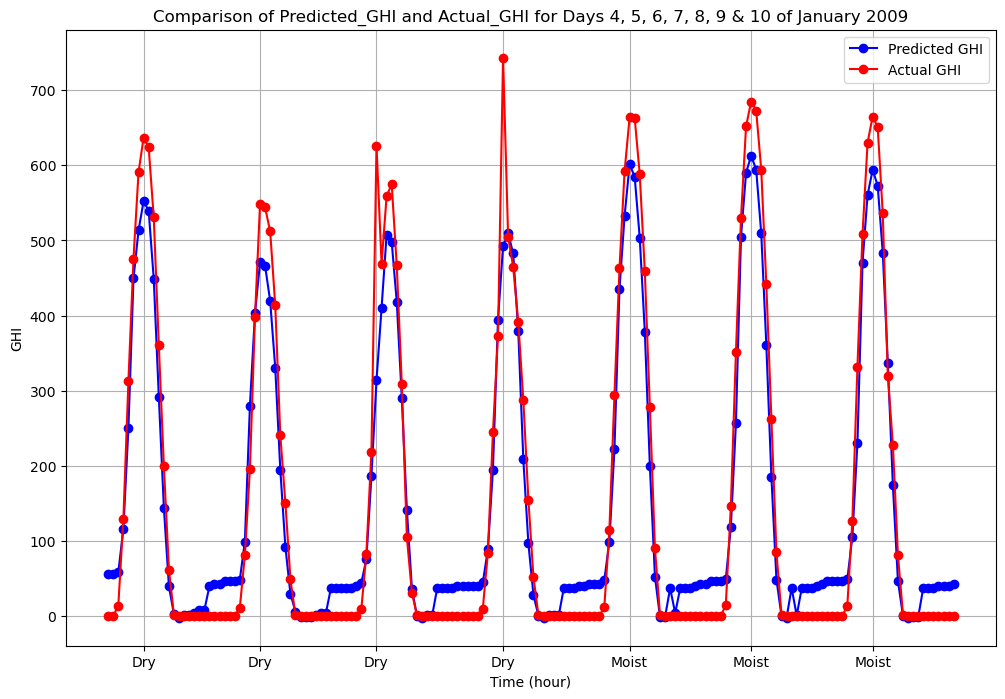

In [36]:
import matplotlib.pyplot as plt

selected_dates_df = df1[(df1['year'] == 2009) & (df1['month'] == 1) & (df1['day'].isin([4, 5, 6, 7,8,9,10]))]

fig, ax = plt.subplots(figsize=(12, 8))

combined_type_labels = {0: 'Clear', 1: 'Non-clear', 2: 'Moist', 3: 'Dry', 4: 'Cloudy', 5: 'Partly Cloudy'}

day_labels = []
peak_positions = []
season_labels = []

for day in [4, 5, 6, 7,8,9,10]:
    selected_day_df = selected_dates_df[selected_dates_df['day'] == day]
    mode_combined_type = selected_day_df['Combined_Type'].mode().iloc[0]
    day_labels.append(combined_type_labels[mode_combined_type])

    peak_position = selected_day_df.loc[selected_day_df['GHI'].idxmax(), 'hour'] + (day - 1) * 24
    peak_positions.append(peak_position)

    mode_season = selected_day_df['Season'].mode().iloc[0]
    season_labels.append(mode_season)

for idx, day in enumerate([4, 5, 6, 7,8,9,10]):
    selected_day_df = selected_dates_df[selected_dates_df['day'] == day]

    position_predicted = selected_day_df['hour'] + (day - 1) * 24
    ax.plot(position_predicted, selected_day_df['Predicted_ghi'], marker='o', color='blue', label='Predicted GHI' if idx == 0 else '')

for idx, day in enumerate([4, 5, 6, 7,8,9,10]):
    selected_day_df = selected_dates_df[selected_dates_df['day'] == day]
    position_normalized = selected_day_df['hour'] + (day - 1) * 24
    ax.plot(position_normalized, selected_day_df['GHI'], marker='o', color='red', label='Actual GHI' if idx == 0 else '')

ax.set_xticks([pos for pos in peak_positions if pos is not None])
ax.set_xticklabels([label for label, pos in zip(day_labels, peak_positions) if pos is not None])

legend = ax.legend()
legend.get_lines()[0].set_linestyle('-')  
legend.get_lines()[0].set_color('blue')  
legend.get_lines()[1].set_linestyle('-')  
legend.get_lines()[1].set_color('red')

ax.set_title('Comparison of Predicted_GHI and Actual_GHI for Days 4, 5, 6, 7, 8, 9 & 10 of January 2009')
ax.set_xlabel('Time (hour)')
ax.set_ylabel('GHI')
ax.grid(True)
plt.show()


# SUMMER

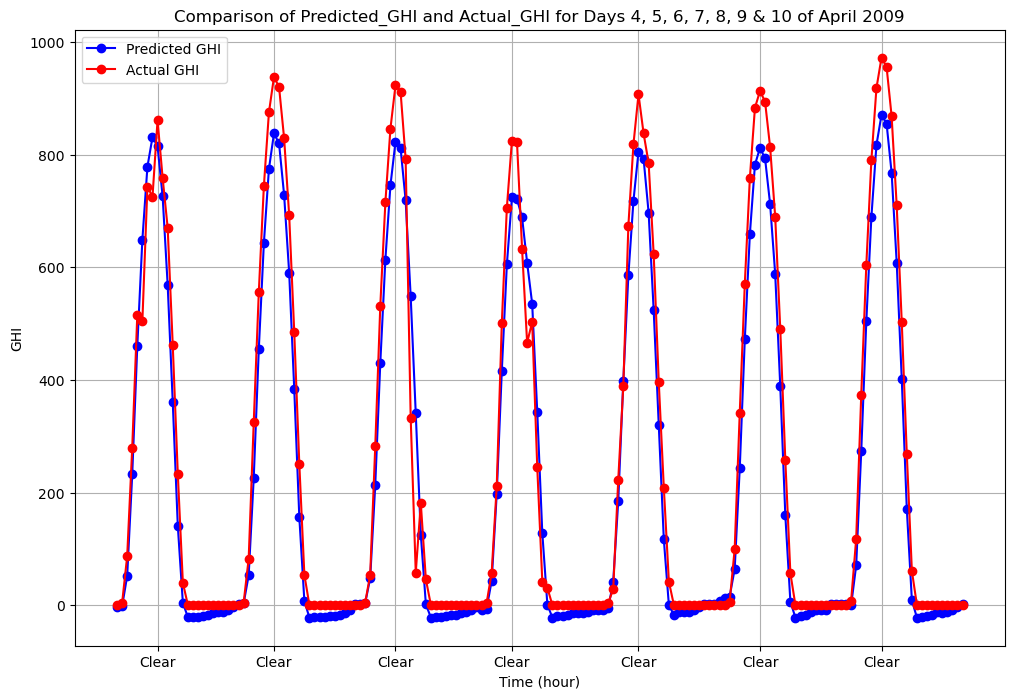

In [37]:
import matplotlib.pyplot as plt

selected_dates_df = df1[(df1['year'] == 2009) & (df1['month'] == 4) & (df1['day'].isin([4, 5, 6, 7, 8, 9, 10]))]

fig, ax = plt.subplots(figsize=(12, 8))

combined_type_labels = {0: 'Clear', 1: 'Non-clear', 2: 'Moist', 3: 'Dry', 4: 'Cloudy', 5: 'Partly Cloudy'}

day_labels = []
peak_positions = []
season_labels = []

for day in [4, 5, 6, 7,8,9,10]:
    selected_day_df = selected_dates_df[selected_dates_df['day'] == day]
    mode_combined_type = selected_day_df['Combined_Type'].mode().iloc[0]
    day_labels.append(combined_type_labels[mode_combined_type])

    peak_position = selected_day_df.loc[selected_day_df['GHI'].idxmax(), 'hour'] + (day - 1) * 24
    peak_positions.append(peak_position)

    mode_season = selected_day_df['Season'].mode().iloc[0]
    season_labels.append(mode_season)

for idx, day in enumerate([4, 5, 6, 7,8,9,10]):
    selected_day_df = selected_dates_df[selected_dates_df['day'] == day]

    position_predicted = selected_day_df['hour'] + (day - 1) * 24
    ax.plot(position_predicted, selected_day_df['Predicted_ghi'], marker='o', color='blue', label='Predicted GHI' if idx == 0 else '')

for idx, day in enumerate([4, 5, 6, 7,8,9,10]):
    selected_day_df = selected_dates_df[selected_dates_df['day'] == day]
    position_normalized = selected_day_df['hour'] + (day - 1) * 24
    ax.plot(position_normalized, selected_day_df['GHI'], marker='o', color='red', label='Actual GHI' if idx == 0 else '')

ax.set_xticks([pos for pos in peak_positions if pos is not None])
ax.set_xticklabels([label for label, pos in zip(day_labels, peak_positions) if pos is not None])

legend = ax.legend()
legend.get_lines()[0].set_linestyle('-')  
legend.get_lines()[0].set_color('blue')  
legend.get_lines()[1].set_linestyle('-')  
legend.get_lines()[1].set_color('red')

ax.set_title('Comparison of Predicted_GHI and Actual_GHI for Days 4, 5, 6, 7, 8, 9 & 10 of April 2009')
ax.set_xlabel('Time (hour)')
ax.set_ylabel('GHI')
ax.grid(True)
plt.show()